In [1]:
import numpy as np
import pandas as pd
from solardatatools import DataHandler
from solardatatools.algorithms import PVQuantiles, Dilation

In [2]:
df = pd.read_csv('test_power.csv', index_col=0, parse_dates=[0])


/var/folders/b7/w_t5_6fd7qs551xt0wvy63240000gr/T/ipykernel_88959/4290931827.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv('test_power.csv', index_col=0, parse_dates=[0])


In [3]:
dh = DataHandler(df)
dh.run_pipeline(power_col='ac_power_inv_30339', verbose=True)


            *********************************************
            * Solar Data Tools Data Onboarding Pipeline *
            *********************************************

            This pipeline runs a series of preprocessing, cleaning, and quality
            control tasks on stand-alone PV power or irradiance time series data.
            After the pipeline is run, the data may be plotted, filtered, or
            further analyzed.

            Authors: Bennet Meyers and Sara Miskovich, SLAC

            (Tip: if you have a mosek [https://www.mosek.com/] license and have it
            installed on your system, try setting solver='MOSEK' for a speedup)

            This material is based upon work supported by the U.S. Department
            of Energy's Office of Energy Efficiency and Renewable Energy (EERE)
            under the Solar Energy Technologies Office Award Number 38529.

            


task list:   0%|                                          | 0/7 [00:00<?, ?it/s]

task list: 100%|██████████████████████████████████| 7/7 [00:05<00:00,  1.36it/s]



total time: 5.15 seconds
--------------------------------
Breakdown
--------------------------------
Preprocessing              0.52s
Cleaning                   0.03s
Filtering/Summarizing      4.60s
    Data quality           0.02s
    Clear day detect       0.03s
    Clipping detect        3.98s
    Capacity change detect 0.57s



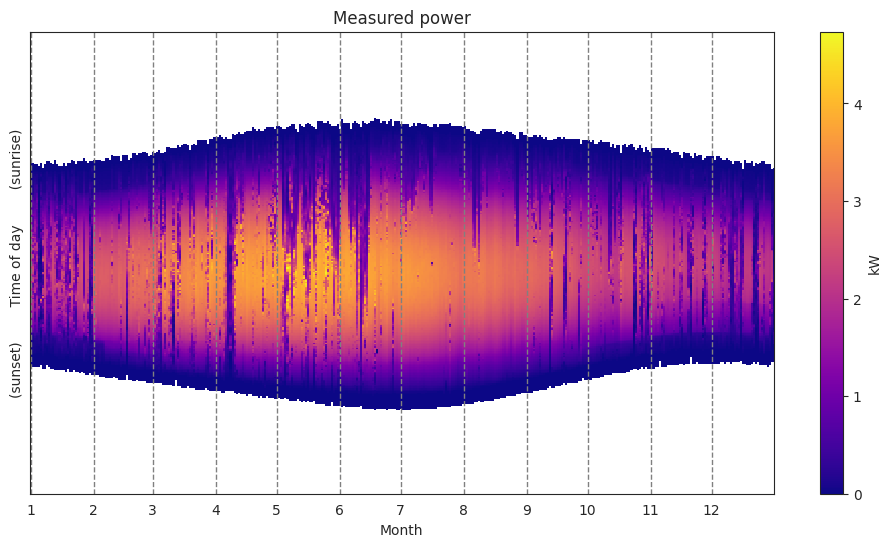

In [4]:
dh.plot_heatmap('raw');

In [11]:
dh.estimate_quantiles(nvals_dil=21, quantile_levels=[.2, .5, .8], num_harmonics=[8, 3], regularization=0.5, verbose=True)

  0%|                                                     | 0/3 [00:00<?, ?it/s](CVXPY) Jun 24 01:58:55 PM: Your problem has 63 variables, 0 constraints, and 1 parameters.
(CVXPY) Jun 24 01:58:55 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jun 24 01:58:55 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jun 24 01:58:55 PM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jun 24 01:58:55 PM: Compiling problem (target solver=CLARABEL).
(CVXPY) Jun 24 01:58:55 PM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> CLARABEL
(CVXPY) Jun 24 01:58:55 PM: Applying reduction Dcp2Cone
(CVXPY) Jun 24 01:58:55 PM: Applying reduction CvxAttr2Constr
(CVXPY) Jun 24 01:58:55 PM: Applying reduction ConeMatrixStuffing
(CVXPY) Jun 24 01:58:55 PM: Applying reduction CLARABEL


                                     CVXPY                                     
                                     v1.6.6                                    
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------


(CVXPY) Jun 24 01:58:55 PM: Finished problem compilation (took 2.629e-01 seconds).
(CVXPY) Jun 24 01:58:55 PM: (Subsequent compilations of this problem, using the same arguments, should take less time.)
(CVXPY) Jun 24 01:58:55 PM: Invoking solver CLARABEL  to obtain a solution.


-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
-------------------------------------------------------------
           Clarabel.rs v0.11.1  -  Clever Acronym                

                   (c) Paul Goulart                          
                University of Oxford, 2022                   
-------------------------------------------------------------

problem:
  variables     = 7436
  constraints   = 14683
  nnz(P)        = 63
  nnz(A)        = 935805
  cones (total) = 2
    :        Zero = 1,  numel = 63
    : Nonnegative = 1,  numel = 14620

settings:
  linear algebra: direct / qdldl, precision: 64 bit (1 thread)
  max iter = 200, time limit = Inf,  max step = 0.990
  tol_feas = 1.0e-8, tol_gap_abs = 1.0e-8, tol_gap_rel = 1.0e-8,
  static reg : on, ϵ1 = 1.0e-8, ϵ2 = 4.9e-32
  dynamic r

(CVXPY) Jun 24 01:58:57 PM: Problem status: optimal
(CVXPY) Jun 24 01:58:57 PM: Optimal value: 7.845e+02
(CVXPY) Jun 24 01:58:57 PM: Compilation took 2.629e-01 seconds
(CVXPY) Jun 24 01:58:57 PM: Solver (including time spent in interface) took 2.090e+00 seconds
 33%|███████████████                              | 1/3 [00:02<00:04,  2.36s/it](CVXPY) Jun 24 01:58:57 PM: Your problem has 63 variables, 0 constraints, and 1 parameters.
(CVXPY) Jun 24 01:58:57 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jun 24 01:58:57 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jun 24 01:58:57 PM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jun 24 01:58:57 PM: Using cached ASA map, for faster compilation (bypassing reduction chain).
(CVXPY) Jun 24 01:58:57 PM: Finished problem compilation (took 6.394e-03 seconds).
(CVXPY) Jun 24 01:58:57 PM: Invoking solver CLARABEL  to obtain a solution.


 32  +7.8454e+02  +7.8454e+02  2.33e-09  1.31e-12  2.25e-10  4.03e-13  6.03e-11  9.66e-01  
---------------------------------------------------------------------------------------------
Terminated with status = Solved
solve time = 2.031316208s
-------------------------------------------------------------------------------
                                    Summary                                    
-------------------------------------------------------------------------------
                                     CVXPY                                     
                                     v1.6.6                                    
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
-------------------------------------------------------------------------------
                                Nume

(CVXPY) Jun 24 01:58:58 PM: Problem status: optimal
(CVXPY) Jun 24 01:58:58 PM: Optimal value: 8.191e+02
(CVXPY) Jun 24 01:58:58 PM: Compilation took 6.394e-03 seconds
(CVXPY) Jun 24 01:58:58 PM: Solver (including time spent in interface) took 1.275e+00 seconds
 67%|██████████████████████████████               | 2/3 [00:03<00:01,  1.73s/it](CVXPY) Jun 24 01:58:58 PM: Your problem has 63 variables, 0 constraints, and 1 parameters.
(CVXPY) Jun 24 01:58:58 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jun 24 01:58:58 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jun 24 01:58:58 PM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jun 24 01:58:58 PM: Using cached ASA map, for faster compilation (bypassing reduction chain).
(CVXPY) Jun 24 01:58:58 PM: Finished problem compilation (took 5.435e-03 seconds).
(CVXPY) Jun 24 01:58:58 PM: Invoking solver CLARABEL  to obtain a solution.


 17  +8.1906e+02  +8.1906e+02  4.13e-07  2.73e-10  1.18e-06  5.20e-11  1.80e-08  6.33e-01  
 18  +8.1906e+02  +8.1906e+02  6.68e-08  4.42e-11  1.91e-07  7.43e-12  2.91e-09  9.90e-01  
 19  +8.1906e+02  +8.1906e+02  1.50e-09  9.93e-13  4.30e-09  1.67e-13  6.54e-11  9.78e-01  
---------------------------------------------------------------------------------------------
Terminated with status = Solved
solve time = 1.243516459s
-------------------------------------------------------------------------------
                                    Summary                                    
-------------------------------------------------------------------------------
                                     CVXPY                                     
                                     v1.6.6                                    
-------------------------------------------------------------------------------
                                  Compilation                                  
------------

(CVXPY) Jun 24 01:59:00 PM: Problem status: optimal
(CVXPY) Jun 24 01:59:00 PM: Optimal value: 4.197e+02
(CVXPY) Jun 24 01:59:00 PM: Compilation took 5.435e-03 seconds
(CVXPY) Jun 24 01:59:00 PM: Solver (including time spent in interface) took 1.454e+00 seconds
100%|█████████████████████████████████████████████| 3/3 [00:05<00:00,  1.70s/it]

 22  +4.1970e+02  +4.1970e+02  1.73e-09  5.11e-13  8.93e-11  1.21e-13  3.31e-11  9.18e-01  
---------------------------------------------------------------------------------------------
Terminated with status = Solved
solve time = 1.421234045s
-------------------------------------------------------------------------------
                                    Summary                                    
-------------------------------------------------------------------------------
Quantiles estimated successfully.


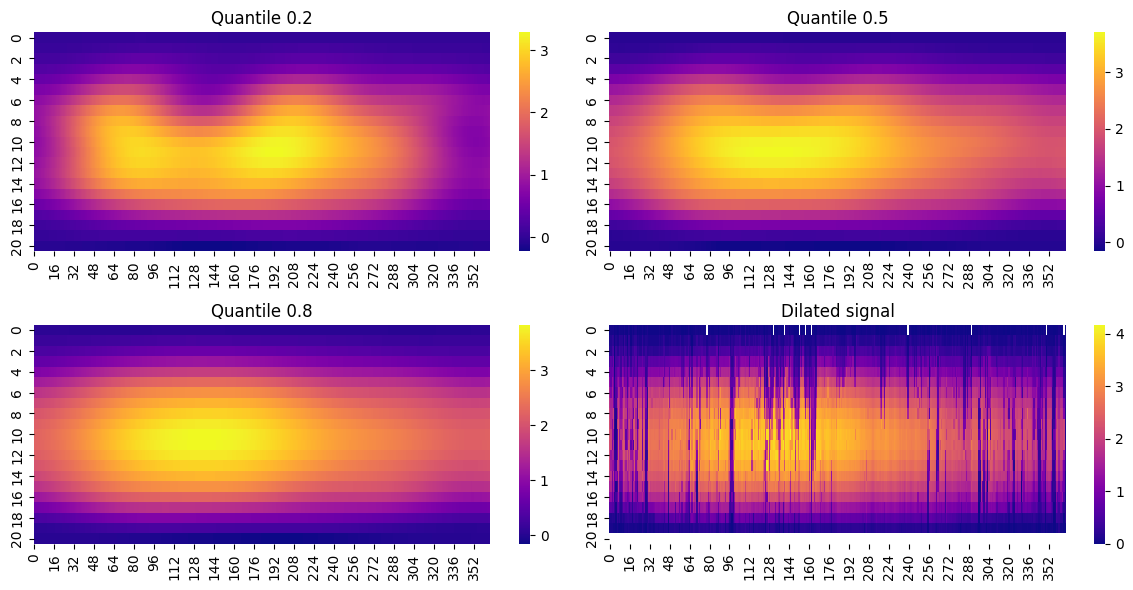

In [6]:
dh.quantile_object.plot_all_quantiles();

In [7]:
quant_ori_df = pd.DataFrame(data=dh.quantile_object.quantiles_original)
quant_dil_df = pd.DataFrame(data=dh.quantile_object.quantiles_dilated)

In [10]:
quant_ori_df.to_csv('quant_ori_df.csv')
quant_dil_df.to_csv('quant_dil_df.csv')

In [9]:
signal_dil = dh.quantile_object.dilation_object.signal_dil
np.savetxt('signal_dil.txt', signal_dil)

In [ ]:
pvq = PVQuantiles(nvals_dil=21, num_harmonics=[8, 3], regularization=0.5)
pvq

In [12]:
len(signal_dil)

7687